# Part II - (Ford GoBike)
## by (Ali Abbadi)

## Investigation Overview

 This presentation aims to summarize key findings from the exploratory analysis
of the Ford GoBike February 2019 dataset. 

## Dataset Overview and Executive Summary

Key insights:
 - Most trips are short (under 30 minutes).
 - Subscribers dominate total rides.
 - Males represent the majority of users, with younger riders taking longer trips.
 - Peak ride hours occur around 8 AM and 5 PM, especially on weekdays.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
sns.set(style="whitegrid", palette="deep", color_codes=True)
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
df.dropna(subset=['start_station_name', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['duration_min'] = df['duration_sec'] / 60
df['hour'] = df['start_time'].dt.hour
df['day'] = df['start_time'].dt.day_name()
df['age'] = 2019 - df['member_birth_year']


## Visualization 1: Trip Duration by User Type



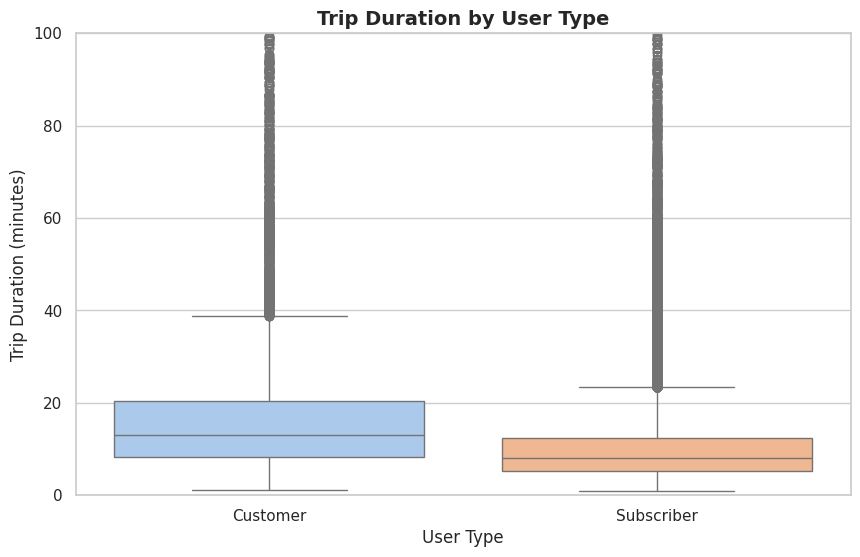

In [6]:
plt.figure()
sns.boxplot(x='user_type', y='duration_min', data=df, palette='pastel')
plt.ylim(0,100)
plt.title('Trip Duration by User Type', fontsize=14, weight='bold')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()


### Descriptive Comment:
 Subscribers take more trips but their rides are typically shorter than Customers.
 Customers tend to take longer leisure trips.

## Visualization 2:Distribution of Riders by Gender and Age



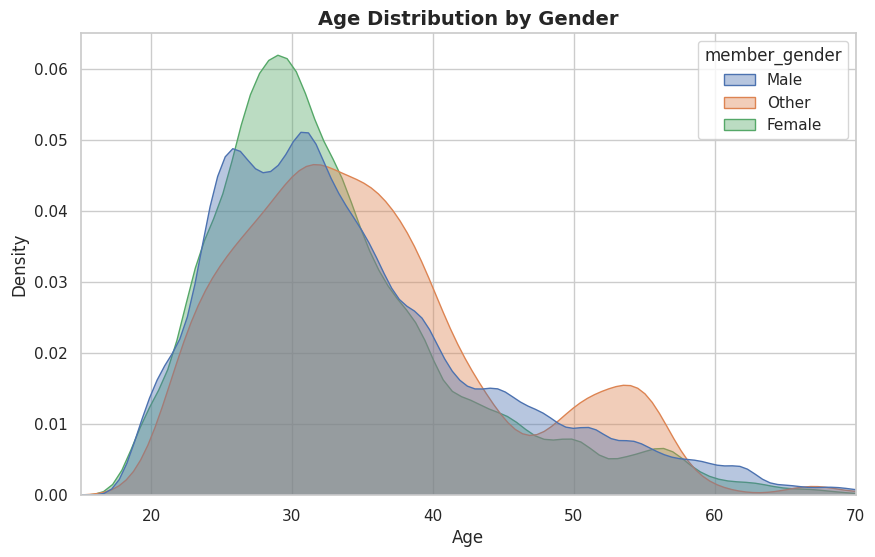

In [7]:
plt.figure()
sns.kdeplot(data=df, x='age', hue='member_gender', common_norm=False, fill=True, alpha=0.4)
plt.xlim(15,70)
plt.title('Age Distribution by Gender', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

###  Descriptive Comment:
 The largest group of riders are males aged between 25–40.
 Female participation is lower but follows a similar age pattern.


## Visualization 3:Ride Frequency by Hour and Day


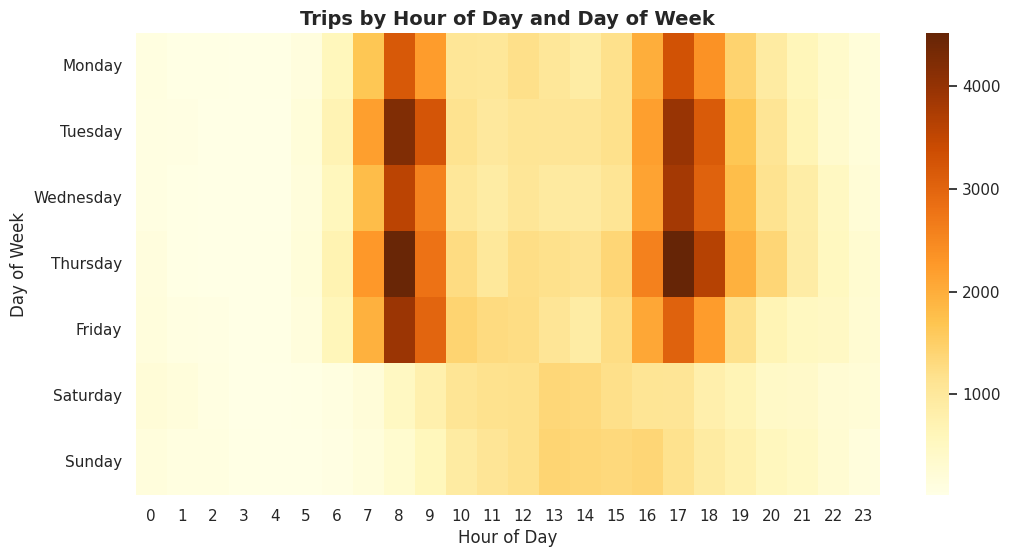

In [8]:
trips_heat = df.groupby(['day','hour']).size().reset_index(name='count')
ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips_heat['day'] = pd.Categorical(trips_heat['day'], categories=ordered_days, ordered=True)
trips_pivot = trips_heat.pivot(index='day', columns='hour', values='count')

plt.figure(figsize=(12,6))
sns.heatmap(trips_pivot, cmap='YlOrBr')
plt.title('Trips by Hour of Day and Day of Week', fontsize=14, weight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

### Descriptive Comment 
 Clear peaks around 8 AM and 5 PM indicate commuter usage.
 Weekdays show higher activity, supporting the workday commuting trend.

## Visualization 4: Gender vs User Type

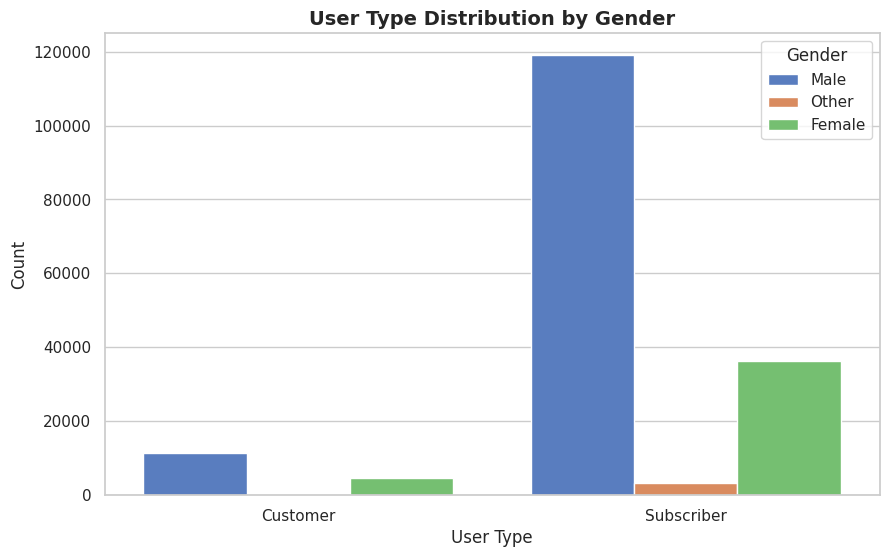

In [9]:
plt.figure()
sns.countplot(x='user_type', hue='member_gender', data=df, palette='muted')
plt.title('User Type Distribution by Gender', fontsize=14, weight='bold')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### Descriptive Comment:

The majority of subscribers are male.
Female customers are fewer in number across both user types.

## Visualization 5: Average Trip Duration by Hour and Gender

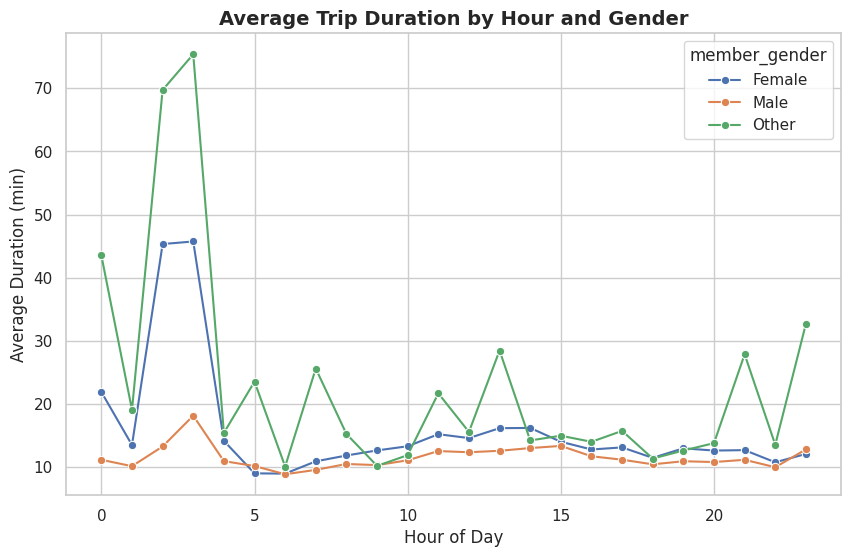

In [10]:
avg_hour_gender = df.groupby(['hour','member_gender'])['duration_min'].mean().reset_index()
plt.figure()
sns.lineplot(data=avg_hour_gender, x='hour', y='duration_min', hue='member_gender', marker='o')
plt.title('Average Trip Duration by Hour and Gender', fontsize=14, weight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (min)')
plt.show()

### Descriptive Comment:
 Trip duration tends to be slightly longer for females across most hours,
 and longer during non-commute hours (midday and late evening).

### Summary of Insights

 - Subscribers dominate usage but take shorter, routine trips.
 - Customers take longer, less frequent leisure trips.
 - Male riders are the majority, mostly aged 25–40.
 - Clear rush-hour patterns show strong weekday commuting behavior.
 - Female riders tend to have slightly longer average trip durations.